## Setup and Load the Data

### Install neccessary Libraries

In [3]:
!pip install pandas seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable


### Load CSV File

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the titanic Dataset
df = pd.read_csv("train.csv")

# Display the first few rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
# Check data types and non-null counts
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

## Clean the Data

### Handle Missing values

In [8]:
# handle 'age' missing value
df['Age'].fillna(df['Age'].median(), inplace=True)

# handle 'cabin' missing values
df.drop('Cabin', axis=1, inplace=True)

# handle 'Embarked' missing values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\thili\AppData\Local\Temp\ipykernel_17256\3488339653.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\thili\AppData\Local\Temp\ipykernel_17256\3488339653.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

### Drop unneccessary coumns & categorized neccessary coumns

In [9]:
# drop unneccessary columns
df.drop(['Ticket', 'Name'], axis=1, inplace=True)

In [11]:
# Convert categorical to category type
df['Sex'] = df['Sex'].astype('category')
df['Emarked'] = df ['Embarked'].astype('category')
df['Pclass'] = df ['Pclass'].astype('category')
df['Sex'] = df ['Sex'].astype('category')

In [13]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Sex          891 non-null    category
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    object  
 9   Emarked      891 non-null    category
dtypes: category(3), float64(2), int64(4), object(1)
memory usage: 51.8+ KB
None
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Emarked        0
dtype: int64


## Understand Each Feature

### Summary of Statistics

In [14]:
# View Summary Statistics
print(df.describe())    # Numrical columns
print(df['Sex'].value_counts())     # Categorical example
print(df['Embarked'].value_counts())

       PassengerId    Survived         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838   29.361582    0.523008    0.381594   32.204208
std     257.353842    0.486592   13.019697    1.102743    0.806057   49.693429
min       1.000000    0.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000   22.000000    0.000000    0.000000    7.910400
50%     446.000000    0.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000   35.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000   80.000000    8.000000    6.000000  512.329200
Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


### Visualize the Distributions

D:\Programs\Anaconda3 Navigator\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


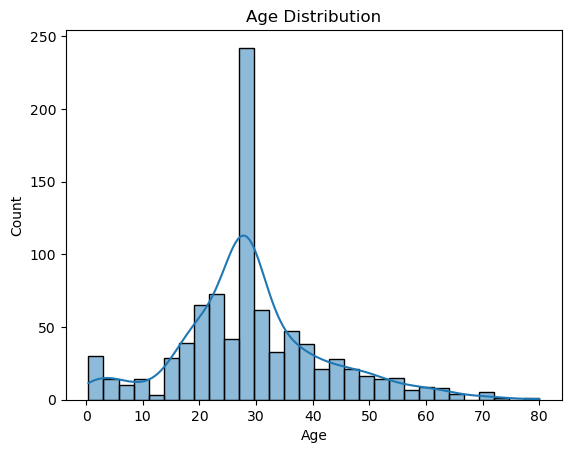

In [21]:
# Age Distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

D:\Programs\Anaconda3 Navigator\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


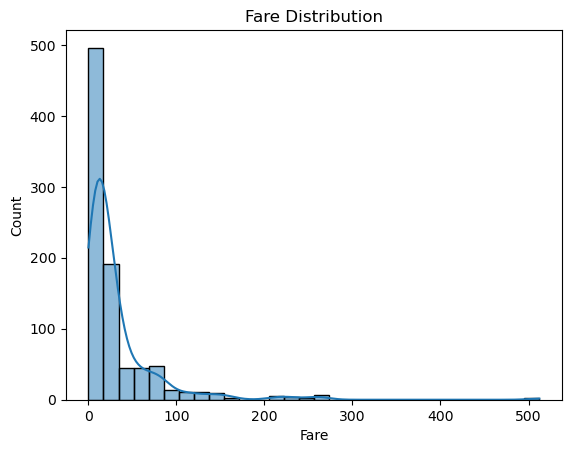

In [22]:
# Fare Distribution
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

### Categorical features

D:\Programs\Anaconda3 Navigator\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


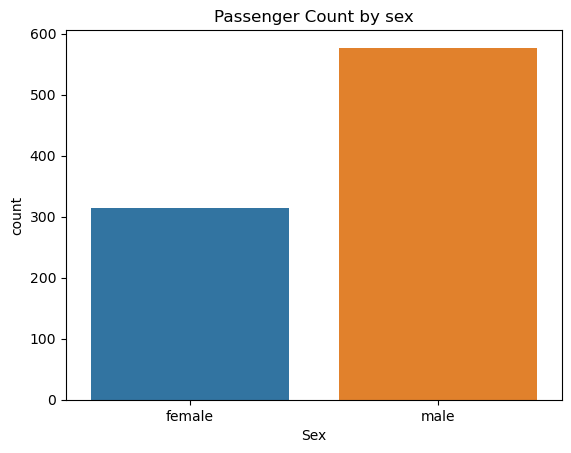

In [23]:
# Sex Count
sns.countplot(x='Sex', data=df)
plt.title('Passenger Count by sex')
plt.show()

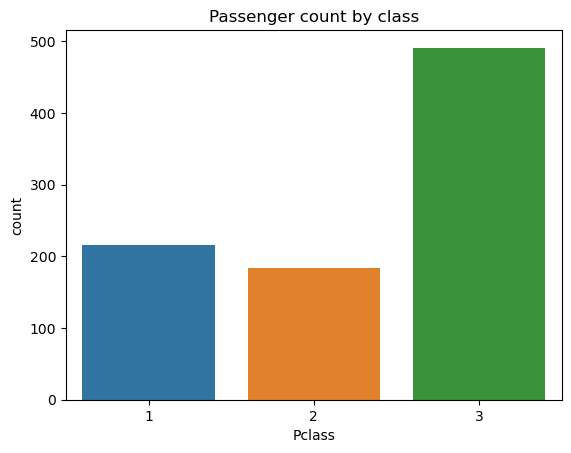

In [24]:
# Pclass Count
sns.countplot(x='Pclass', data=df)
plt.title("Passenger count by class")
plt.show()

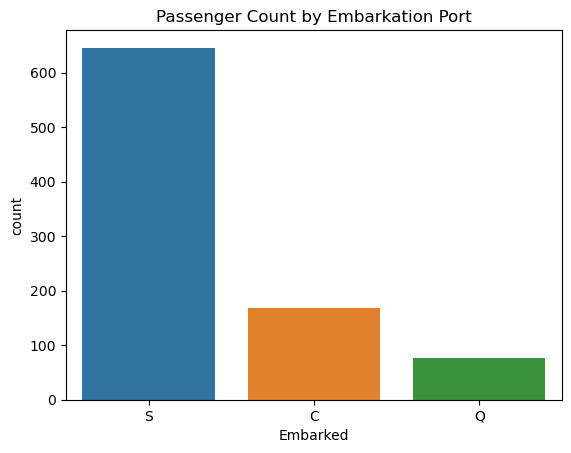

In [25]:
# Emabarked Port
sns.countplot(x='Embarked', data=df)
plt.title('Passenger Count by Embarkation Port')
plt.show()

### Combined Categoorical vs Numerical

D:\Programs\Anaconda3 Navigator\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


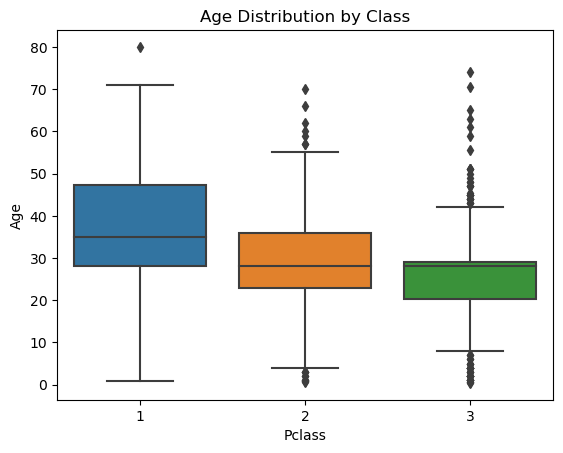

In [27]:
# Age Distributioin by Class
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Class')
plt.show()

D:\Programs\Anaconda3 Navigator\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


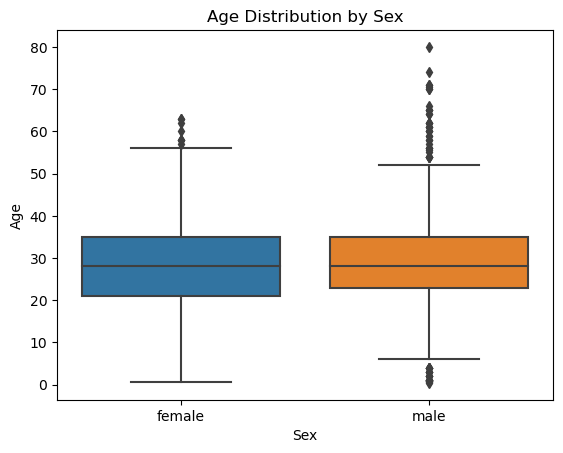

In [28]:
# Age distribution by sex
sns.boxplot(x='Sex', y='Age', data=df)
plt.title('Age Distribution by Sex')
plt.show()

## Explore Survival Rates

### Survival by Gender

In [29]:
# Grouped survival rate
print(df.groupby('Sex')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


C:\Users\thili\AppData\Local\Temp\ipykernel_17256\4170354967.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Sex')['Survived'].mean())


D:\Programs\Anaconda3 Navigator\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


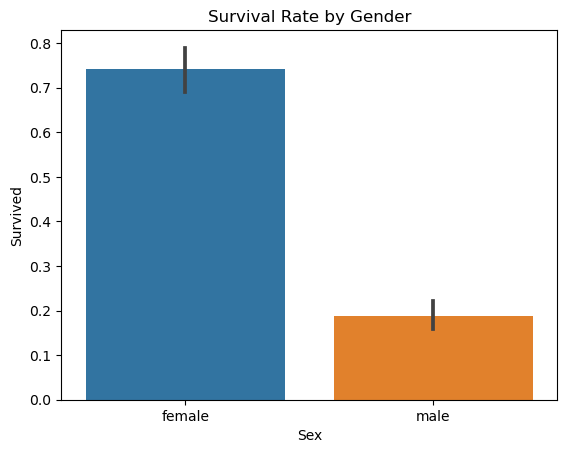

In [30]:
# Box plot
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

### Survived by Passenger Class

In [31]:
# Grouped
print(df.groupby('Pclass')['Survived'].mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


C:\Users\thili\AppData\Local\Temp\ipykernel_17256\1281625432.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Pclass')['Survived'].mean())


D:\Programs\Anaconda3 Navigator\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


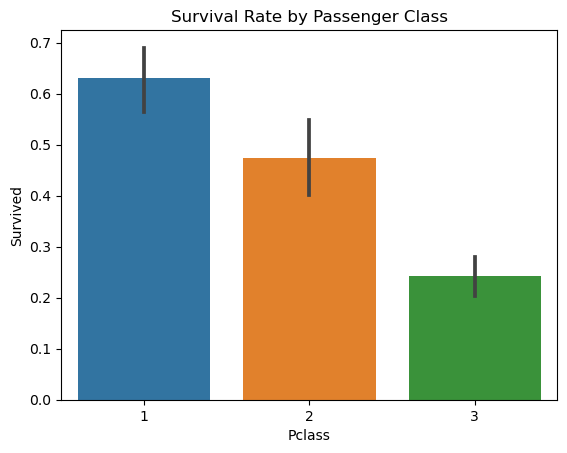

In [32]:
# Bar plot:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

### Survival by Age Group

In [33]:
# Create Age Bins:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,40,60,100],
                    labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])

In [34]:
print(df.groupby('AgeGroup')['Survived'].mean())

AgeGroup
Child          0.579710
Teen           0.428571
Adult          0.360465
Middle-aged    0.390625
Senior         0.227273
Name: Survived, dtype: float64


C:\Users\thili\AppData\Local\Temp\ipykernel_17256\3619442437.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeGroup')['Survived'].mean())


D:\Programs\Anaconda3 Navigator\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


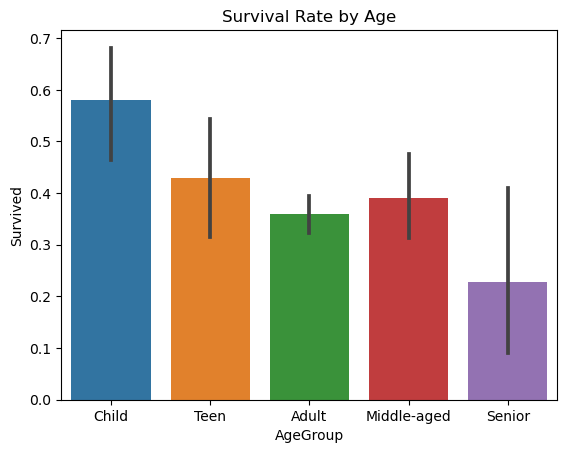

In [35]:
# plot
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age')
plt.show()

### Survival by Emabarked Port

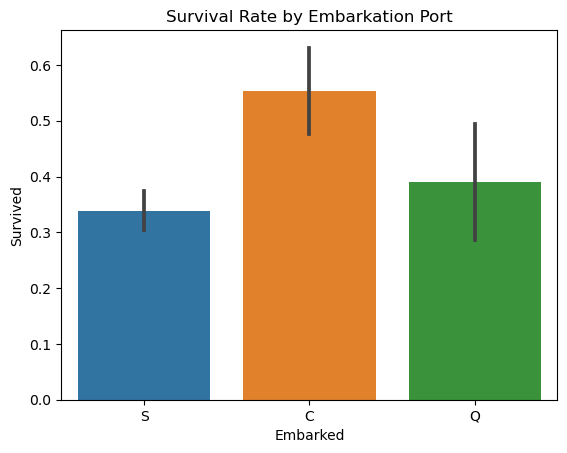

In [36]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarkation Port')
plt.show()

### Combined Analysis: Gender & Class

D:\Programs\Anaconda3 Navigator\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
D:\Programs\Anaconda3 Navigator\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


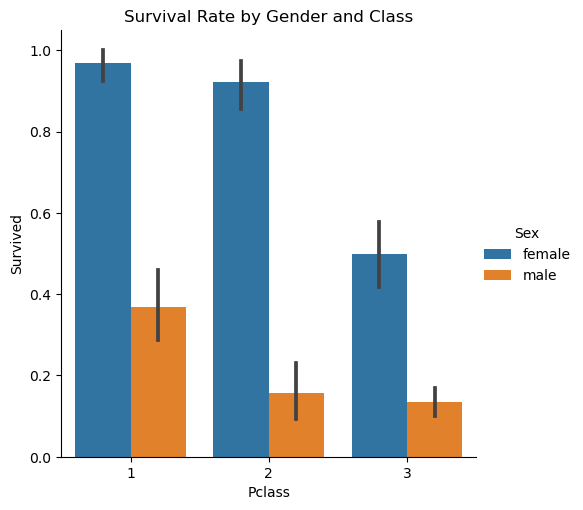

In [37]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=df)
plt.title('Survival Rate by Gender and Class')
plt.show()

# Visualize Relationships with Correlation and Heatmaps

## Correlation Matrix (Numerical Features only)

In [38]:
# Extract only the numerical features
numeric_df = df.select_dtypes(include=['int64', 'float64'])
print(numeric_df.columns)

Index(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [39]:
# Calculate correlations
corr_matrix = numeric_df.corr()
print(corr_matrix)

             PassengerId  Survived       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.005007  0.034212 -0.057527 -0.001652  0.012658
Survived       -0.005007  1.000000 -0.064910 -0.035322  0.081629  0.257307
Age             0.034212 -0.064910  1.000000 -0.233296 -0.172482  0.096688
SibSp          -0.057527 -0.035322 -0.233296  1.000000  0.414838  0.159651
Parch          -0.001652  0.081629 -0.172482  0.414838  1.000000  0.216225
Fare            0.012658  0.257307  0.096688  0.159651  0.216225  1.000000


## Heatmap of Correlations

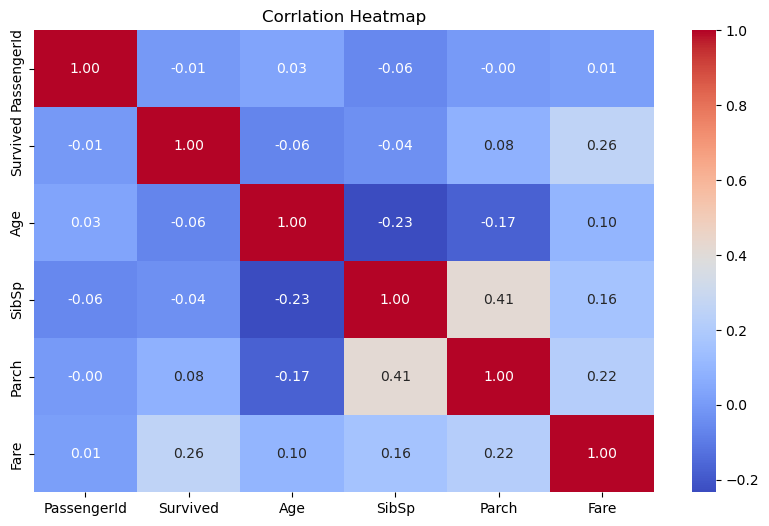

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrlation Heatmap")
plt.show()

## Pairplot

D:\Programs\Anaconda3 Navigator\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programs\Anaconda3 Navigator\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Programs\Anaconda3 Navigator\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programs\Anaconda3 Navigator\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

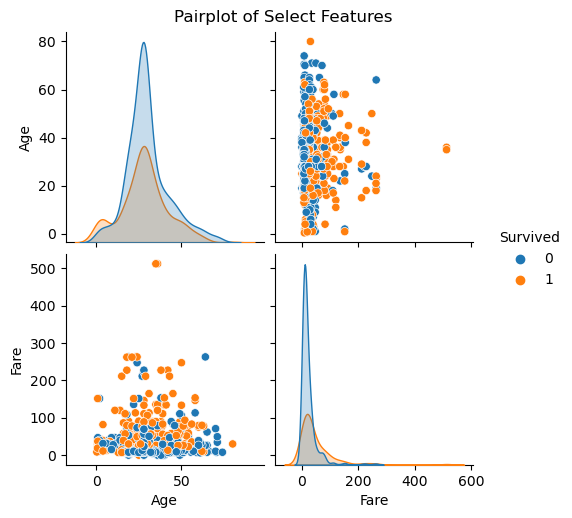

In [41]:
sns.pairplot(df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']], hue='Survived')
plt.suptitle("Pairplot of Select Features", y=1.02)
plt.show()

In [42]:
df['Sex_num'] = df['Sex'].map({'male':0, 'female':1})

## Summary of Exploratory Data Analysis (EDA) on Titanic Dataset

## 📌Key Insights
### 1. Gender
Female passengers had a much higher survival rate than males.

💡 Survival Rate:

Women: ~74%

Men: ~19%

### 2. Passenger Class (Pclass)
Passengers in 1st class had the highest survival rates.

💡 Survival Rate by Class:

1st class: ~63%

2nd class: ~47%

3rd class: ~24%

### 3. Age
Children under 12 had slightly higher survival than other age groups.

Elderly passengers had lower survival rates overall.

Median age of survivors was slightly younger than non-survivors.

### 4. Fare
Higher fares generally associated with higher survival.

Likely due to more expensive tickets being in 1st class.

### 5. Embarked Port
Passengers who boarded at port C (Cherbourg) had a higher survival rate.

Could be linked to class distribution.

### 6. Combined Effect: Gender + Class
1st class women had the highest survival rate.

3rd class men had the lowest survival rate.

## 📈 Visual Tools Used
Histograms for distributions (Age, Fare)

Bar plots for survival rates (Sex, Pclass, Embarked)

Boxplots for age comparison

Heatmaps for correlations

## ✅ Conclusion
Survival on the Titanic was not random — it was strongly influenced by gender, class, age, and fare. This EDA provided a solid foundation to understand the dataset and uncover patterns in survival.